In [1]:
# for calculation
import numpy as np
# for drawing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
# for jupyter Notebook only
%matplotlib inline
# for data analysis
import pandas as pd

# LinReg with L1 regularization
from sklearn.linear_model import Lasso
# LinReg with combined L1 and L2 regularization
from sklearn.linear_model import ElasticNet
# LinReg with L2 regularization (Tychonoff)
from sklearn.linear_model import Ridge
# Ordinary least squares LinReg
from sklearn.linear_model import LinearRegression

# Playing with the DataSet

In [2]:
traind = pd.read_csv(r'train.csv')
print(traind)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [3]:
testd = pd.read_csv(r'test.csv')
print(testd)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [4]:
# Target Variables
trainy = pd.DataFrame(traind[{'Id','SalePrice'}], columns = {'Id','SalePrice'})
testy = pd.read_csv(r'sample_submission.csv')
print(trainy)

      SalePrice    Id
0        208500     1
1        181500     2
2        223500     3
3        140000     4
4        250000     5
...         ...   ...
1455     175000  1456
1456     210000  1457
1457     266500  1458
1458     142125  1459
1459     147500  1460

[1460 rows x 2 columns]


In [5]:
# Full dataset
dataset = pd.concat([traind.drop('SalePrice',axis=1),testd],ignore_index=True)
print(dataset)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

## Encoding as Numbers

In [6]:
traind.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# columns for auto-encoding (categories appearing are not obviously correlated)
aecols = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 
 'Electrical', 'GarageType', 'GarageFinish', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
mecols = ['LotShape', 'LandSlope', 'Neighborhood', 'ExterQual', 'ExterCond', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 
 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']

I will need to create some dictionaries and since NaN cannot be a key value, I need to replace it with something else: 

In [8]:
traind[aecols+mecols]=traind[aecols+mecols].fillna('my_nan')
testd[aecols+mecols]=testd[aecols+mecols].fillna('my_nan')
dataset[aecols+mecols]=dataset[aecols+mecols].fillna('my_nan')
print(traind)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street   Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  my_nan      Reg   
1        2          20       RL         80.0     9600   Pave  my_nan      Reg   
2        3          60       RL         68.0    11250   Pave  my_nan      IR1   
3        4          70       RL         60.0     9550   Pave  my_nan      IR1   
4        5          60       RL         84.0    14260   Pave  my_nan      IR1   
...    ...         ...      ...          ...      ...    ...     ...      ...   
1455  1456          60       RL         62.0     7917   Pave  my_nan      Reg   
1456  1457          20       RL         85.0    13175   Pave  my_nan      Reg   
1457  1458          70       RL         66.0     9042   Pave  my_nan      Reg   
1458  1459          20       RL         68.0     9717   Pave  my_nan      Reg   
1459  1460          20       RL         75.0     9937   Pave  my_nan      Reg   

     LandContour Utilities 

In [9]:
auto_encoder = {}
for my_col in aecols:
    my_cats = pd.Categorical(dataset[my_col]).categories
    my_dict= {}
    for i, my_cat in enumerate(my_cats):
        my_dict[my_cat] = i
    auto_encoder[my_col] = my_dict
    
print(auto_encoder)

{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4, 'my_nan': 5}, 'Street': {'Grvl': 0, 'Pave': 1}, 'Alley': {'Grvl': 0, 'Pave': 1, 'my_nan': 2}, 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}, 'Utilities': {'AllPub': 0, 'NoSeWa': 1, 'my_nan': 2}, 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}, 'Condition1': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}, 'Condition2': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNn': 7}, 'BldgType': {'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}, 'HouseStyle': {'1.5Fin': 0, '1.5Unf': 1, '1Story': 2, '2.5Fin': 3, '2.5Unf': 4, '2Story': 5, 'SFoyer': 6, 'SLvl': 7}, 'RoofStyle': {'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5}, 'RoofMatl': {'ClyTile': 0, 'CompShg': 1, 'Membran': 2, 'Metal': 3, 'Roll': 4, 'Tar&Grv': 5, 'WdShake': 6, 'WdShngl': 7}, 'Exterior1st': {'AsbShng': 0,

In [10]:
traind.replace(auto_encoder)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,Reg,3,0,...,0,my_nan,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,Reg,3,0,...,0,my_nan,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,IR1,3,0,...,0,my_nan,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,IR1,3,0,...,0,my_nan,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,IR1,3,0,...,0,my_nan,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,Reg,3,0,...,0,my_nan,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,Reg,3,0,...,0,my_nan,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,Reg,3,0,...,0,my_nan,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,Reg,3,0,...,0,my_nan,4,4,0,4,2010,8,4,142125


In [11]:
# check whether python preserves order in data_description.txt or not
for my_col in mecols:
    if (my_col!='Neighborhood'):
        print(my_col, pd.Categorical(traind[my_col]).categories)

LotShape Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
LandSlope Index(['Gtl', 'Mod', 'Sev'], dtype='object')
ExterQual Index(['Ex', 'Fa', 'Gd', 'TA'], dtype='object')
ExterCond Index(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype='object')
BsmtQual Index(['Ex', 'Fa', 'Gd', 'TA', 'my_nan'], dtype='object')
BsmtCond Index(['Fa', 'Gd', 'Po', 'TA', 'my_nan'], dtype='object')
BsmtExposure Index(['Av', 'Gd', 'Mn', 'No', 'my_nan'], dtype='object')
BsmtFinType1 Index(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', 'my_nan'], dtype='object')
BsmtFinType2 Index(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', 'my_nan'], dtype='object')
HeatingQC Index(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype='object')
KitchenQual Index(['Ex', 'Fa', 'Gd', 'TA'], dtype='object')
Functional Index(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'], dtype='object')
FireplaceQu Index(['Ex', 'Fa', 'Gd', 'Po', 'TA', 'my_nan'], dtype='object')
GarageQual Index(['Ex', 'Fa', 'Gd', 'Po', 'TA', 'my_nan'], dtype='object')
GarageCond Index

Taken from https://nycdatascience.com/blog/r/ames-iowa-real-estate-analysis/
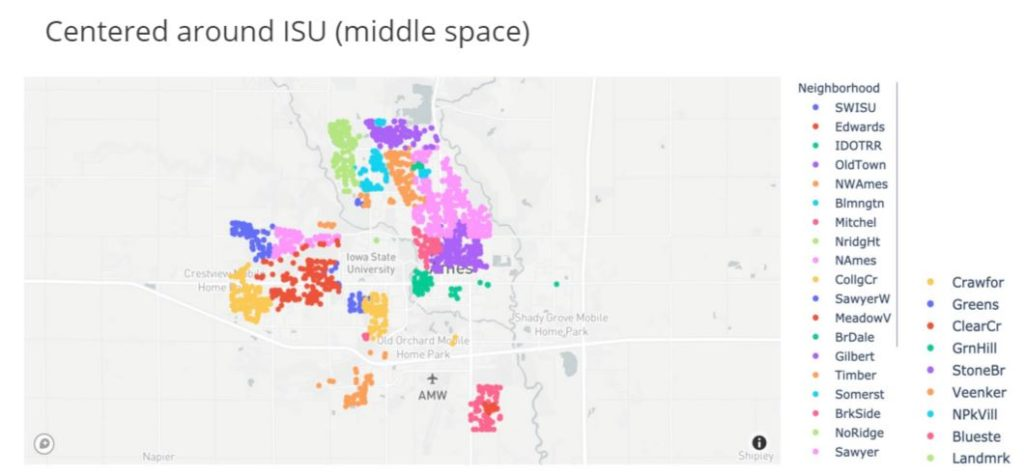

In [12]:
# Neighborhoods
print(pd.Categorical(traind['Neighborhood']).categories)

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')


In [13]:
manual_encoder={
 'LotShape': {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}, 
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'Blmngtn': 1.4, 'Blueste': 7.8, 'BrDale': 2.7, 'BrkSide': 4.5, 'ClearCr': 11.2, 
                  'CollgCr': 8.2, 'Crawfor': 8, 'Edwards': 9.5, 'Gilbert': 1.3, 'IDOTRR': 5.5, 
                  'MeadowV': 6.3, 'Mitchel': 6.2, 'NAmes': 3, 'NPkVill': 2.7, 'NWAmes': 2, 
                  'NoRidge': 0.8, 'NridgHt': 0.5, 'OldTown': 4, 'SWISU': 8.5, 'Sawyer': 11, 
                  'SawyerW': 10.5, 'Somerst': 1, 'StoneBr': 1.5, 'Timber': 7.5, 'Veenker': 0.5}, 
 'ExterQual': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4}, 
 'ExterCond': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4}, 
 'BsmtQual': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'my_nan': 5}, 
 'BsmtCond': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'my_nan': 5}, 
 'BsmtExposure': {'Gd': 0, 'Av': 1, 'Mn': 2, 'No': 3, 'my_nan': 4}, 
 'BsmtFinType1': {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'my_nan': 6}, 
 'BsmtFinType2': {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'my_nan': 6}, 
 'HeatingQC': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4}, 
 'KitchenQual': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'my_nan': 5}, 
 'Functional': {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7, 'my_nan': 8}, 
 'FireplaceQu': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'my_nan': 5}, 
 'GarageQual': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'my_nan': 5}, 
 'GarageCond': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'my_nan': 5}, 
 'PavedDrive': {'Y': 0, 'P': 1, 'N': 2}, 
 'PoolQC': {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'my_nan': 4}
}

In [14]:
# merge both encoders
my_encoder = {**auto_encoder, **manual_encoder}
print(my_encoder)

{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4, 'my_nan': 5}, 'Street': {'Grvl': 0, 'Pave': 1}, 'Alley': {'Grvl': 0, 'Pave': 1, 'my_nan': 2}, 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}, 'Utilities': {'AllPub': 0, 'NoSeWa': 1, 'my_nan': 2}, 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}, 'Condition1': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}, 'Condition2': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNn': 7}, 'BldgType': {'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}, 'HouseStyle': {'1.5Fin': 0, '1.5Unf': 1, '1Story': 2, '2.5Fin': 3, '2.5Unf': 4, '2Story': 5, 'SFoyer': 6, 'SLvl': 7}, 'RoofStyle': {'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5}, 'RoofMatl': {'ClyTile': 0, 'CompShg': 1, 'Membran': 2, 'Metal': 3, 'Roll': 4, 'Tar&Grv': 5, 'WdShake': 6, 'WdShngl': 7}, 'Exterior1st': {'AsbShng': 0,

In [15]:
traind=traind.replace(my_encoder)
print(traind)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            0            3          0  ...        

In [16]:
testd = testd.replace(my_encoder)
print(testd)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         2         80.0    11622       1      2   
1     1462          20         3         81.0    14267       1      2   
2     1463          60         3         74.0    13830       1      2   
3     1464          60         3         78.0     9978       1      2   
4     1465         120         3         43.0     5005       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4         21.0     1936       1      2   
1455  2916         160         4         21.0     1894       1      2   
1456  2917          20         3        160.0    20000       1      2   
1457  2918          85         3         62.0    10441       1      2   
1458  2919          60         3         74.0     9627       1      2   

      LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0            0            3          0  ...  

In [17]:
# export to .csv just to save it
traind.to_csv(r'num_train.csv', index = False)
testd.to_csv(r'num_test.csv', index = False)

# Visualizing Data

In [18]:
# check that all data is numeric
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
# check that all data is numeric
testd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   float64
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

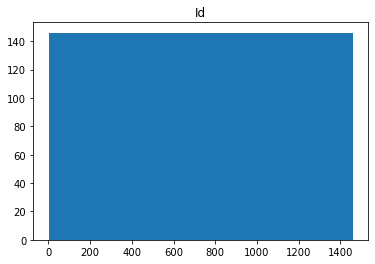

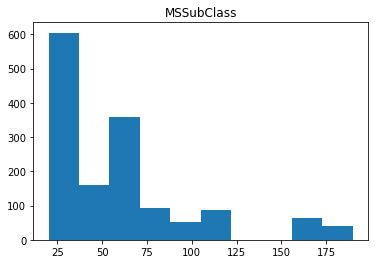

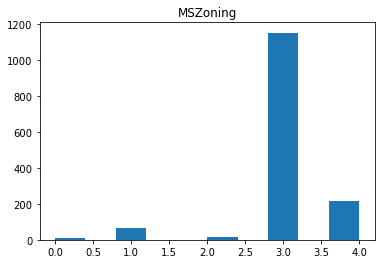

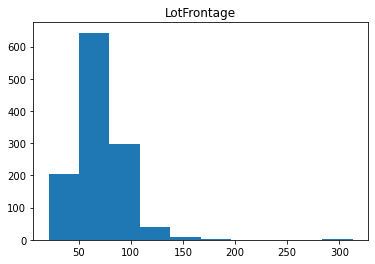

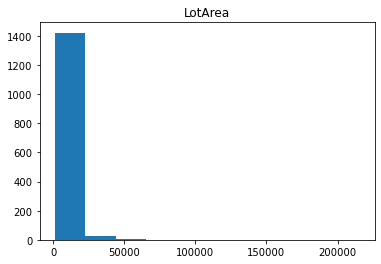

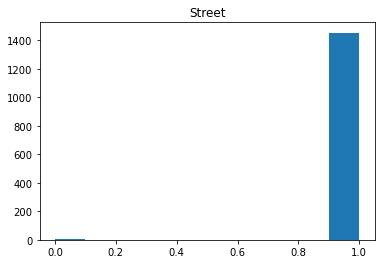

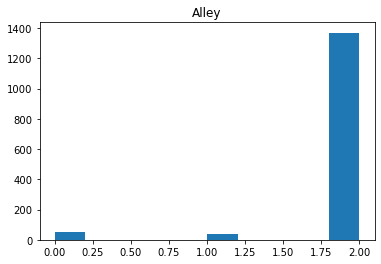

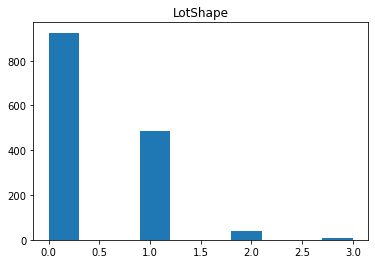

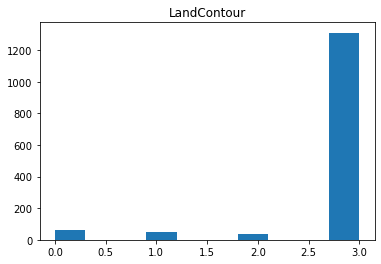

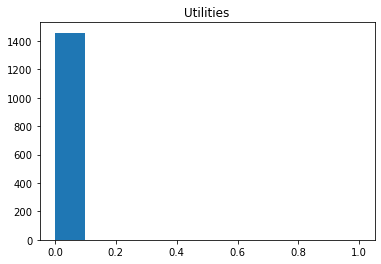

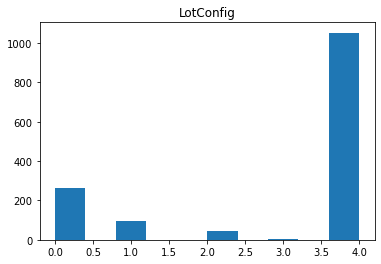

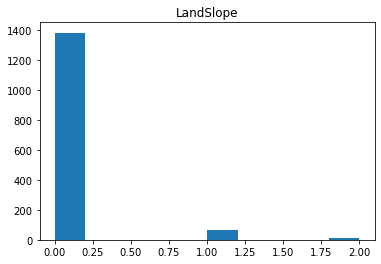

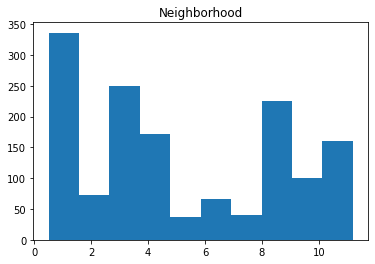

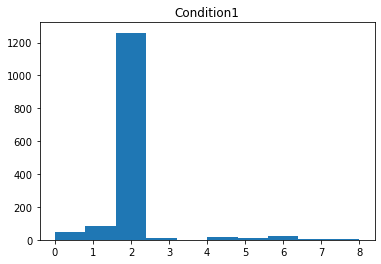

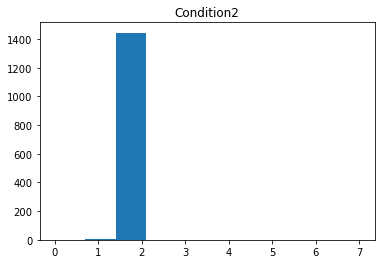

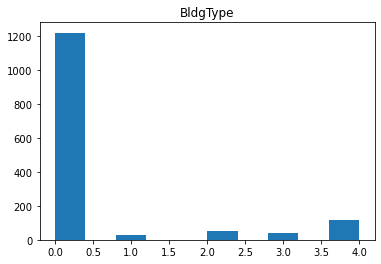

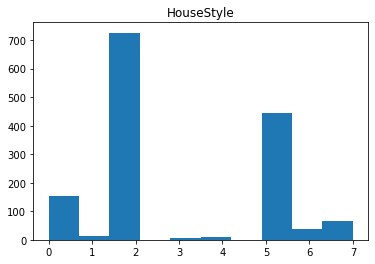

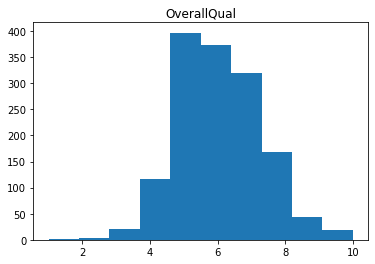

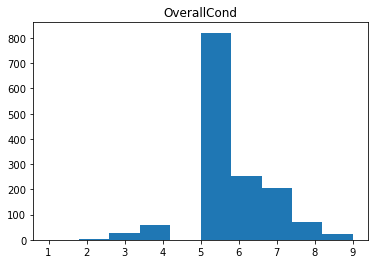

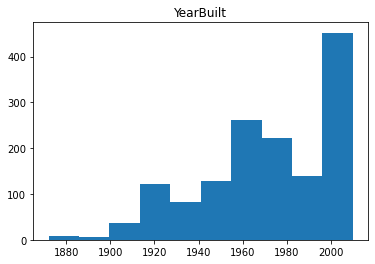

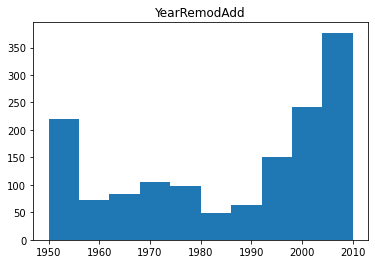

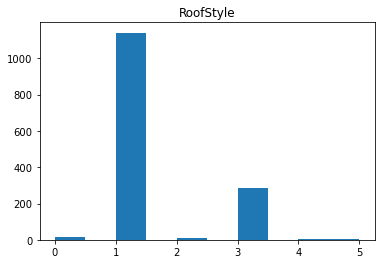

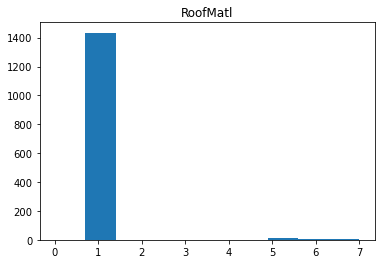

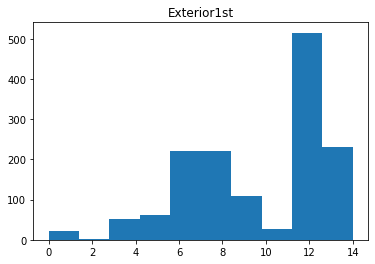

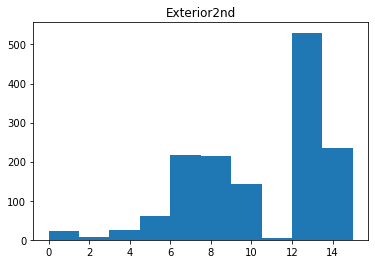

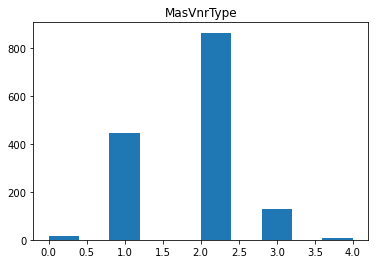

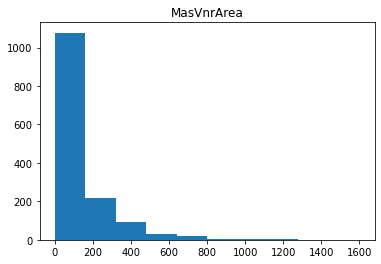

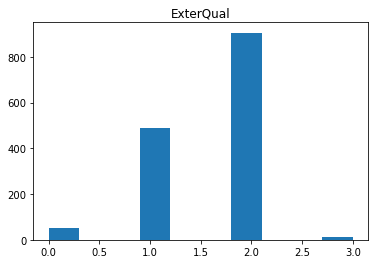

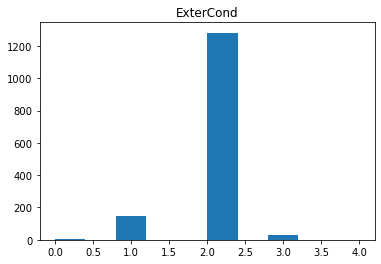

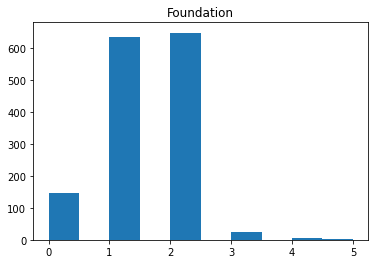

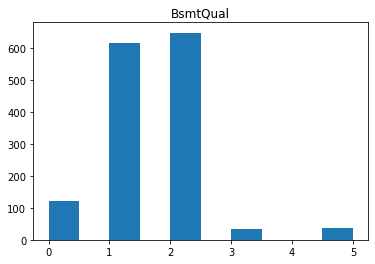

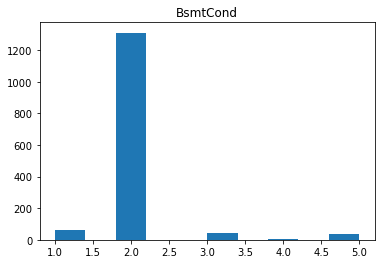

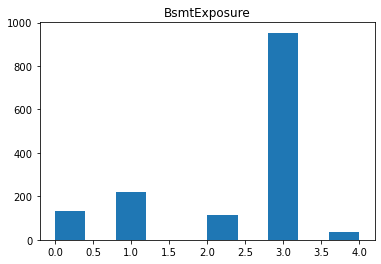

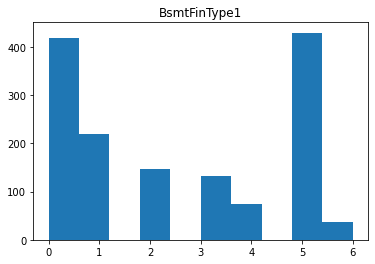

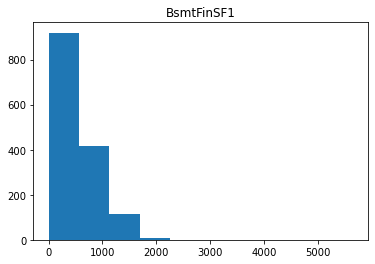

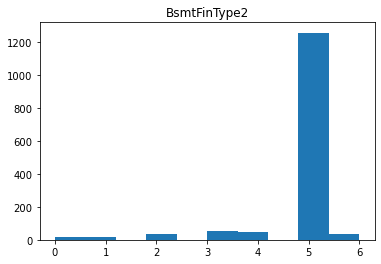

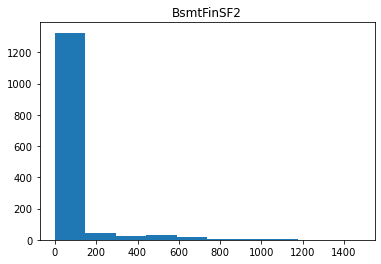

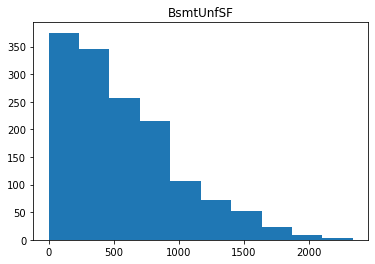

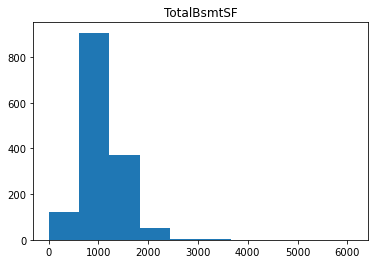

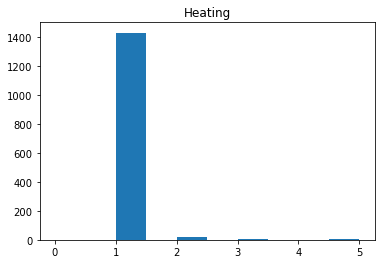

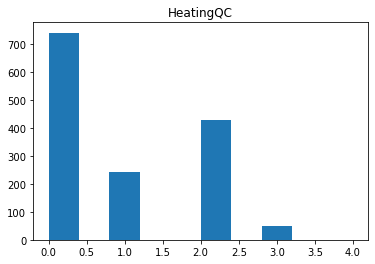

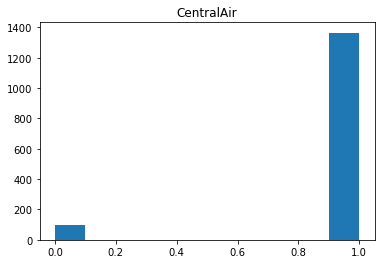

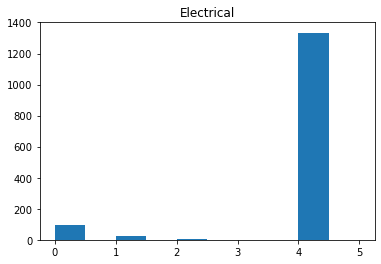

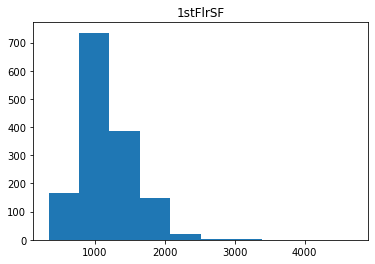

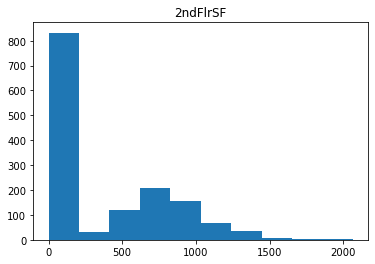

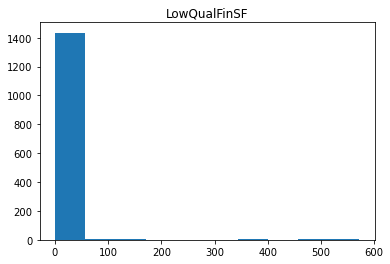

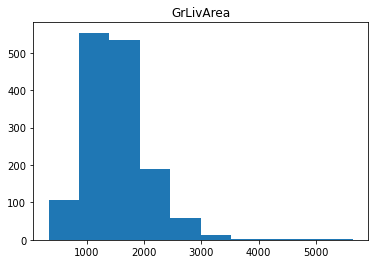

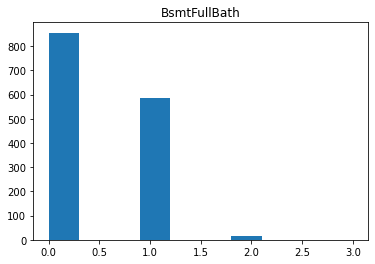

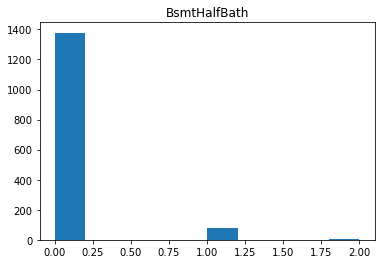

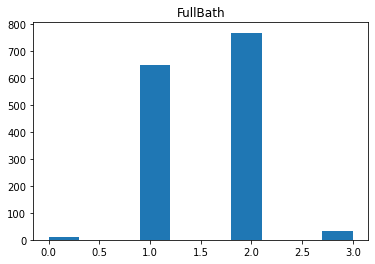

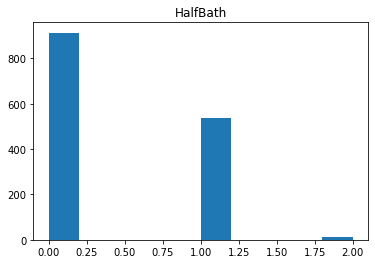

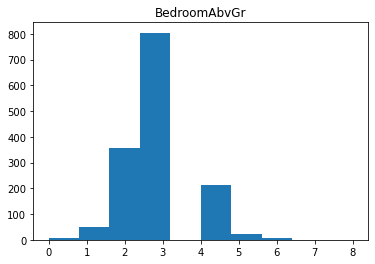

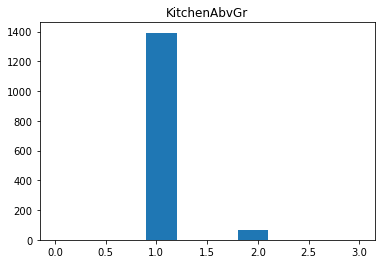

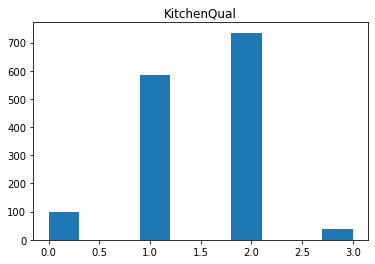

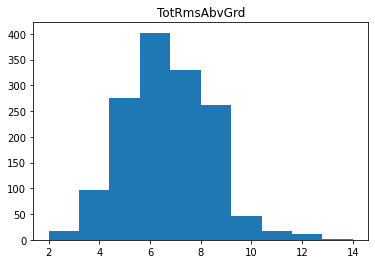

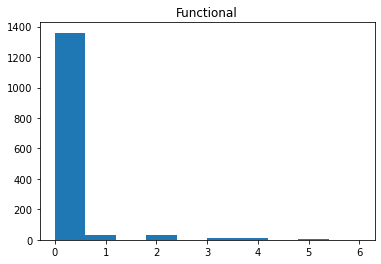

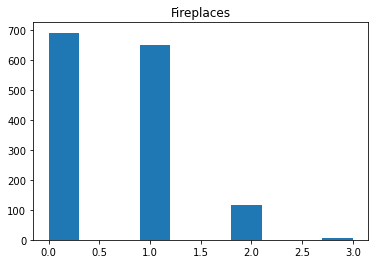

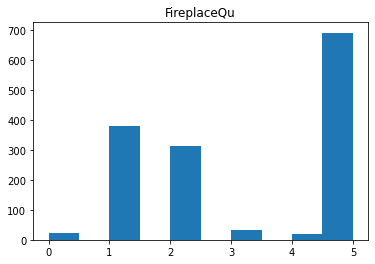

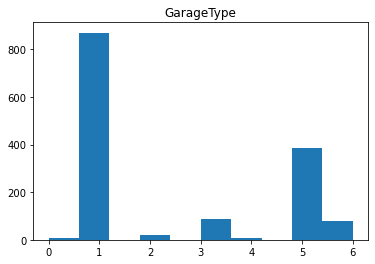

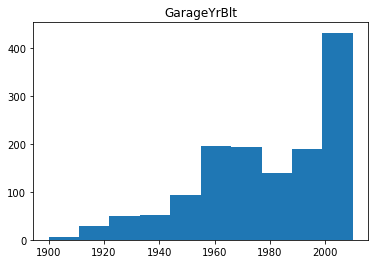

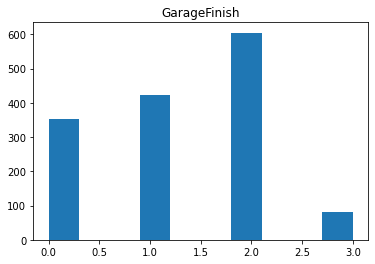

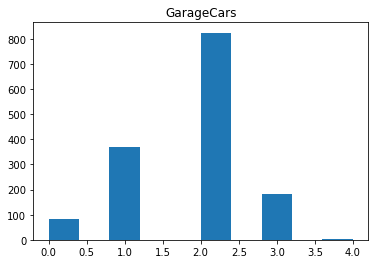

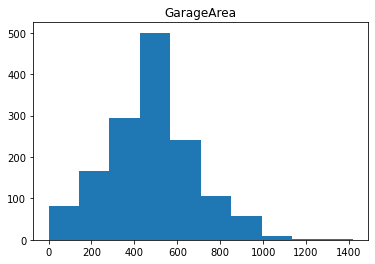

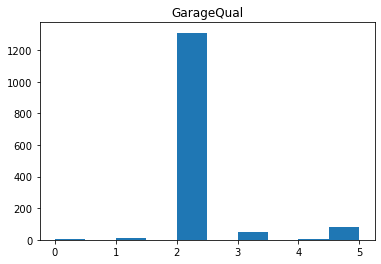

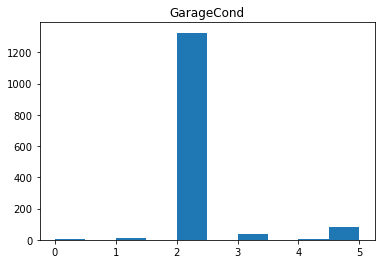

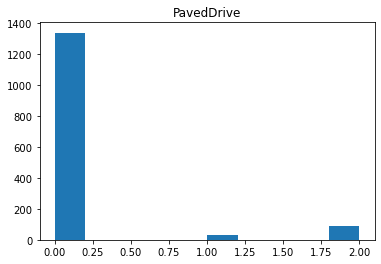

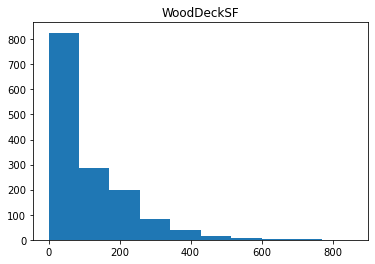

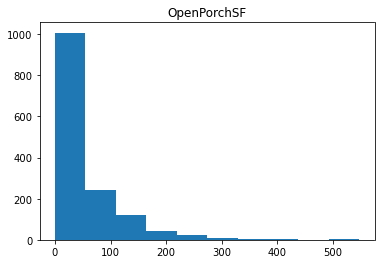

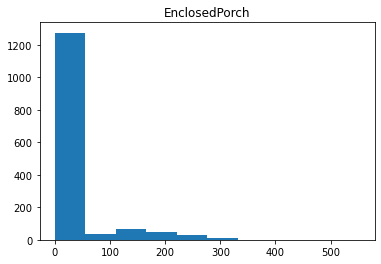

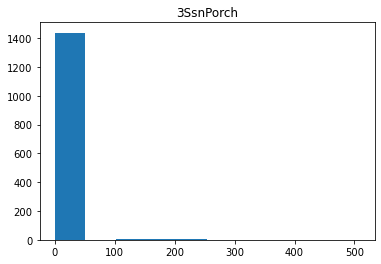

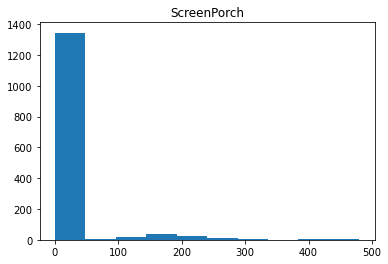

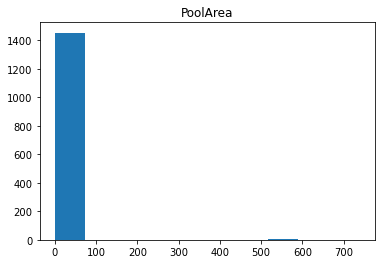

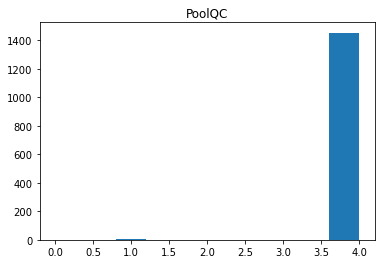

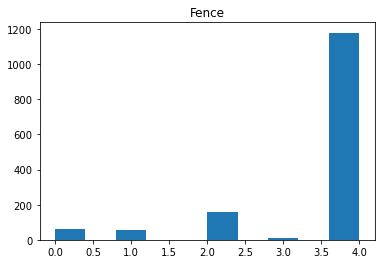

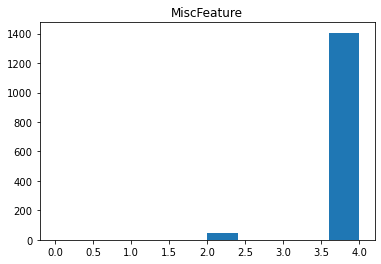

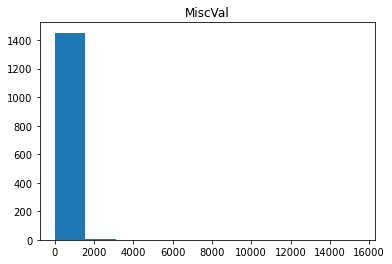

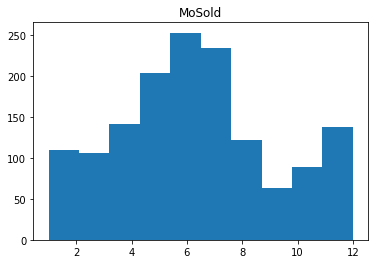

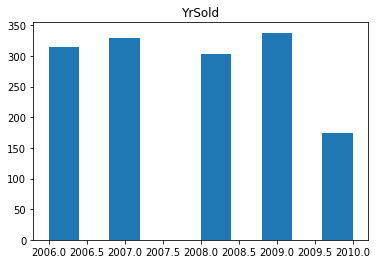

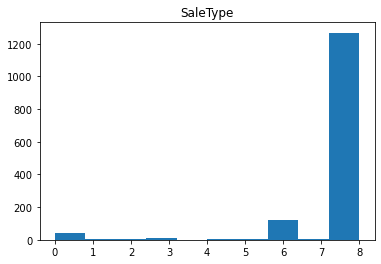

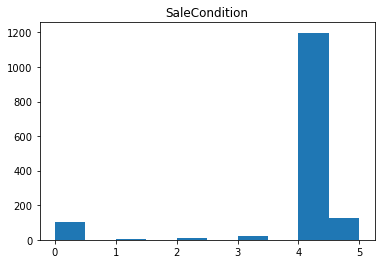

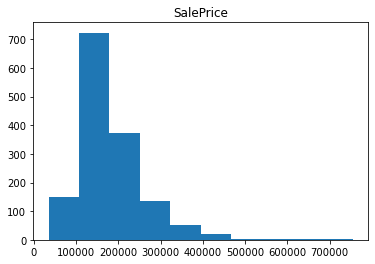

In [20]:
for my_col in traind.columns:
    plt.hist(traind[my_col])
    plt.title(my_col)
    plt.show()

<AxesSubplot:>

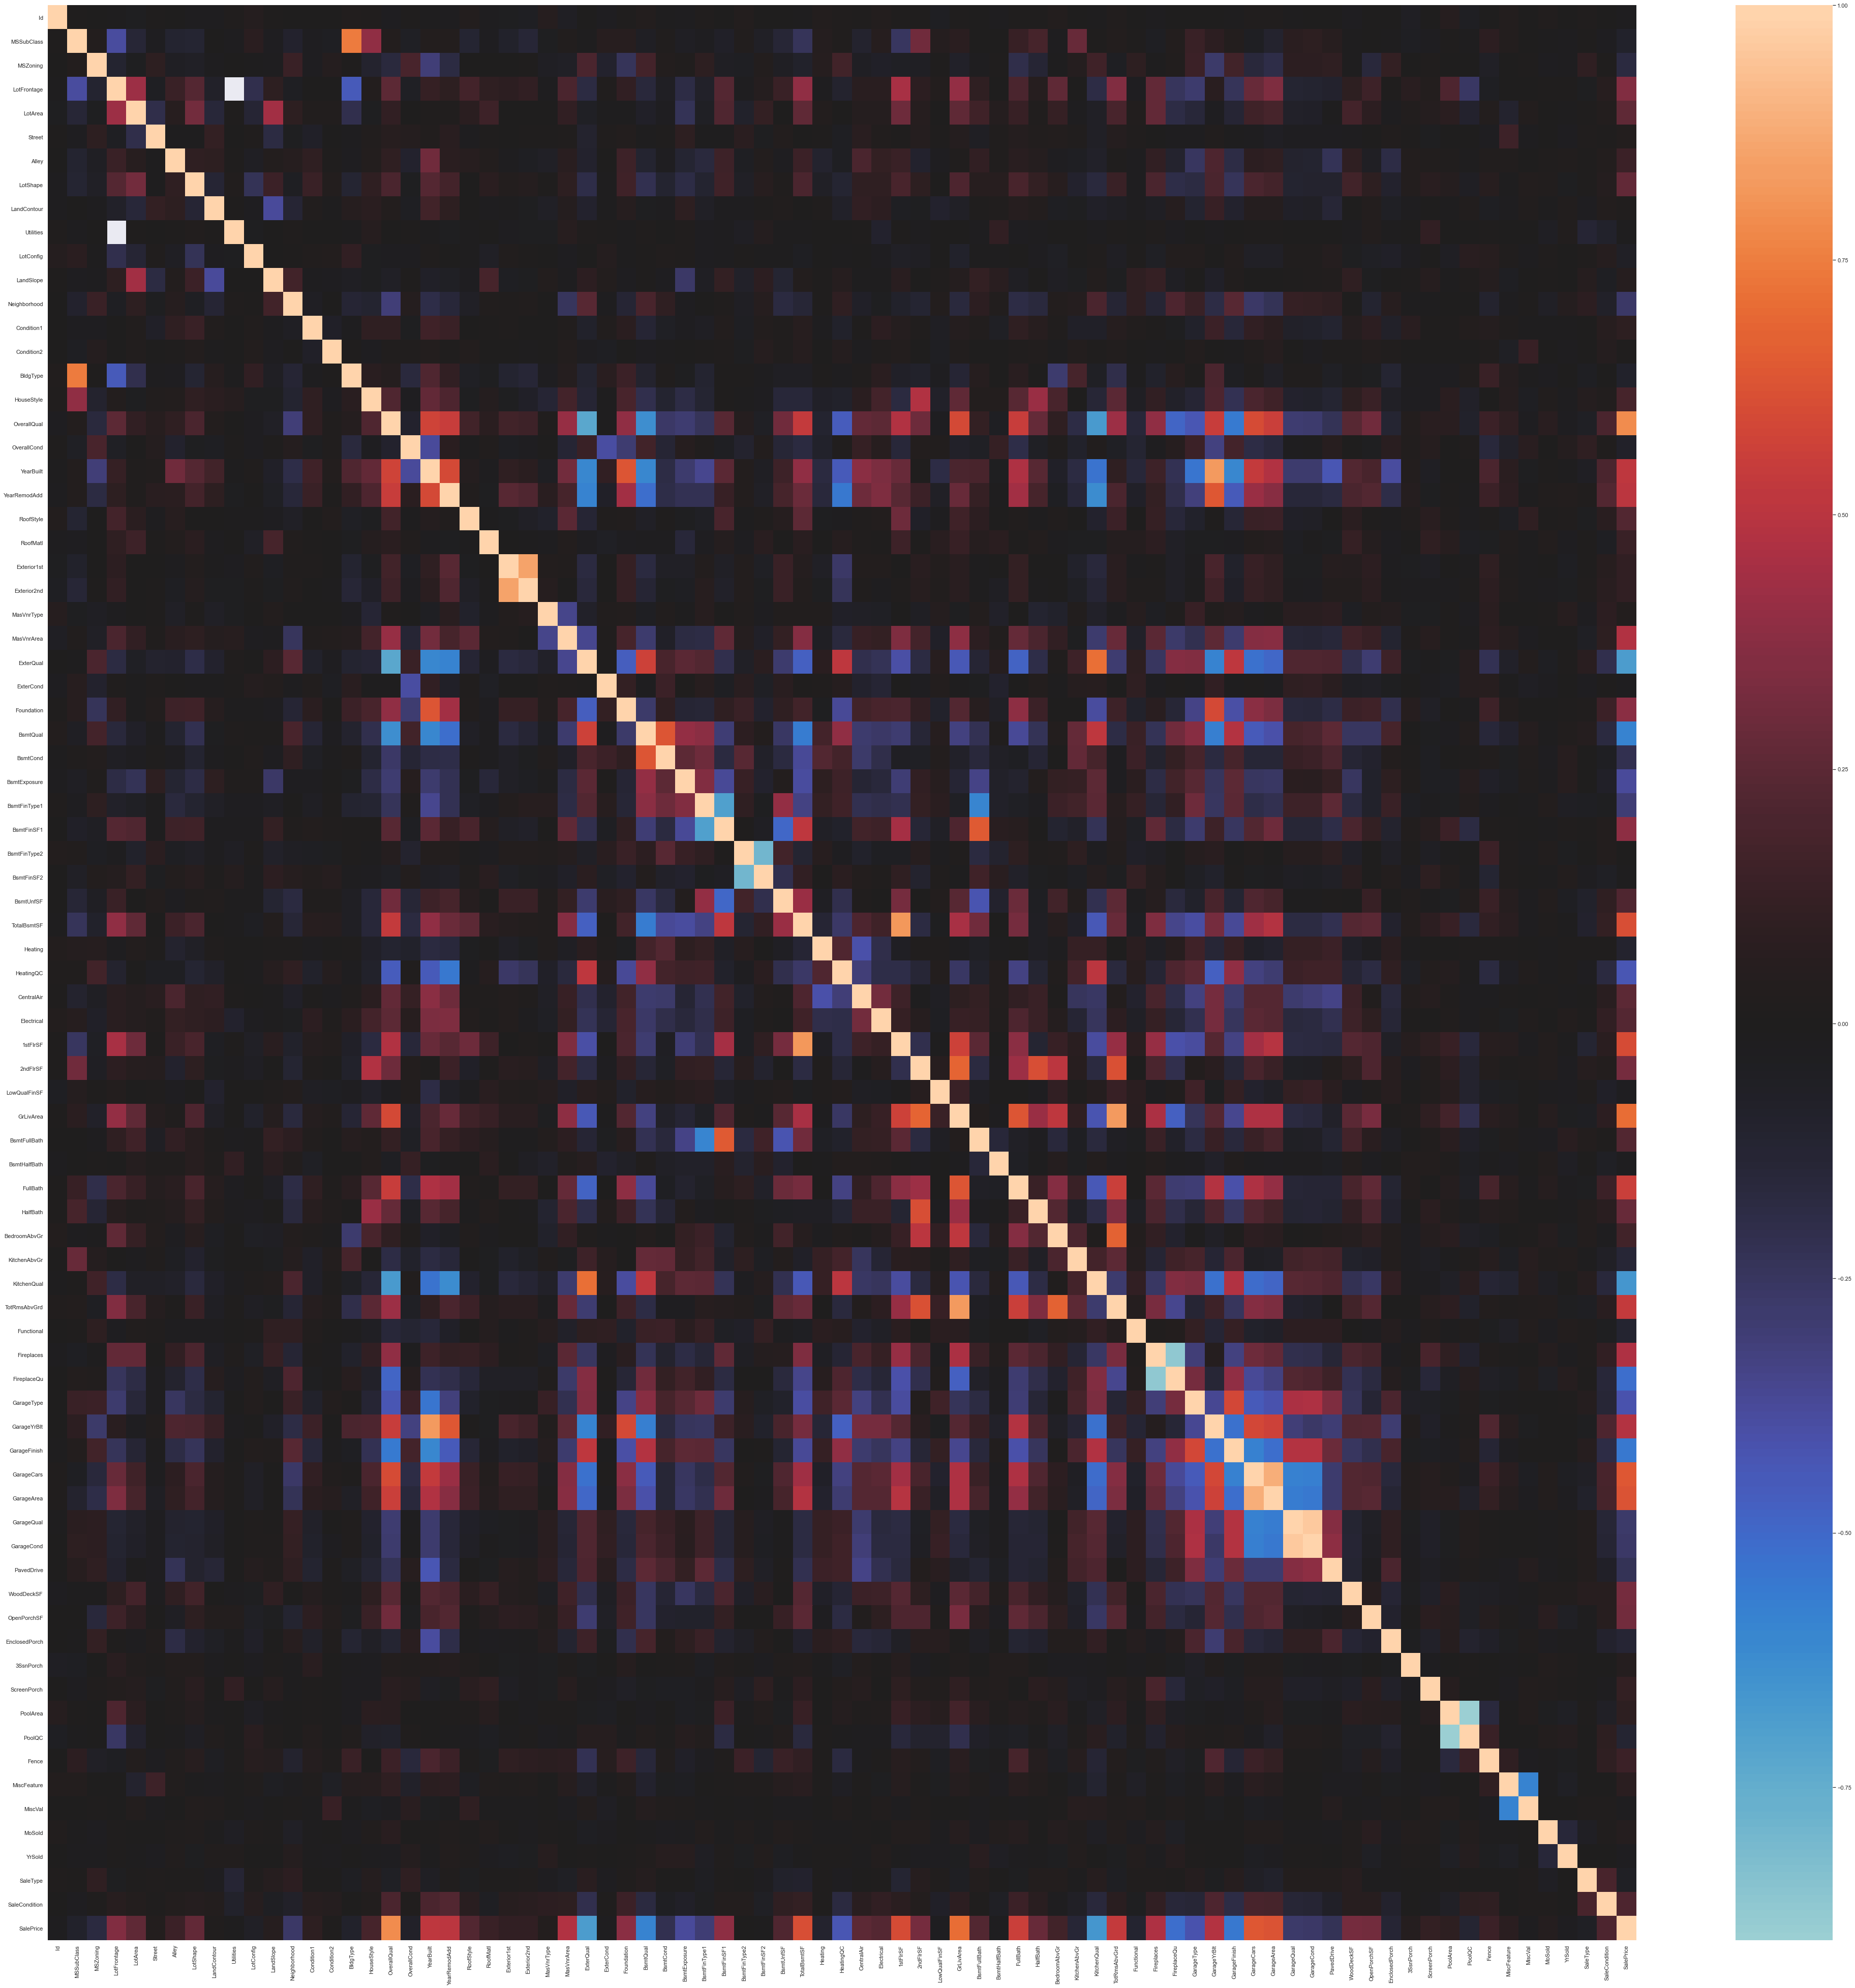

In [21]:
# correlation matrix
sb.set_theme(rc = {'figure.figsize':(70,70)})
sb.heatmap(traind.corr(), center=0)

In [22]:
# feature selection
feature_list={'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
              'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
              'Condition1', 'Condition2', 'HouseStyle', 'OverallQual', 
              'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
              'MasVnrType', 'MasVnrArea', 'ExterCond', 'BsmtCond', 
              'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 
              'Heating', 'Electrical', 'LowQualFinSF', 'GrLivArea', 
              'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional',
              'Fireplaces', 'GarageType', 'GarageCars', 'PavedDrive', 
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
              'ScreenPorch', 'PoolArea', 'Fence', 'MiscFeature', 'MoSold', 
              'YrSold', 'SaleType', 'SaleCondition'}
len(feature_list)

50

## Filling Missing Values and Normalizing

In [23]:
# check for NaN
traind.isnull().values.any()

True

In [24]:
traind = traind.fillna(traind.mean()) # also converts data to Pandas DataFrame
testd = testd.fillna(testd.mean())
trainy = trainy['SalePrice']
testy = testy['SalePrice']
#traind = traind.fillna(traind.median())
#traind = traind.dropna() # drop rows containing NaN

In [25]:
# check for NaN
traind.isnull().values.any() or testd.isnull().values.any()

False

In [26]:
# for normalization (preserving labels of features)
from sklearn.preprocessing import StandardScaler
scaled_data = pd.DataFrame(StandardScaler().fit_transform(traind[feature_list]),columns = feature_list)
print(scaled_data)

      LotFrontage   LotArea  EnclosedPorch  PoolArea  WoodDeckSF  \
0       -0.229372 -0.207142      -0.359325 -0.068692   -0.752176   
1        0.451936 -0.091886      -0.359325 -0.068692    1.626195   
2       -0.093110  0.073480      -0.359325 -0.068692   -0.752176   
3       -0.456474 -0.096897       4.092524 -0.068692   -0.752176   
4        0.633618  0.375148      -0.359325 -0.068692    0.780197   
...           ...       ...            ...       ...         ...   
1455    -0.365633 -0.260560      -0.359325 -0.068692   -0.752176   
1456     0.679039  0.266407      -0.359325 -0.068692    2.033231   
1457    -0.183951 -0.147810      -0.359325 -0.068692   -0.752176   
1458    -0.093110 -0.080160       1.473789 -0.068692    2.168910   
1459     0.224833 -0.058112      -0.359325 -0.068692    5.121921   

      BsmtHalfBath  Condition1  Neighborhood  OverallCond     Alley  ...  \
0        -0.241061   -0.036289      0.905957    -0.517200  0.244717  ...   
1         3.948809   -1.188074 

# Modelling

In [27]:
stsc = StandardScaler()
stsc.fit(traind[feature_list])
traind = stsc.transform(traind[feature_list])
testd = stsc.transform(testd[feature_list])

### (Copy-Paste from Code3.2_Regularization.ipynb code seen in week 4)

In [28]:
# import algorithms
from sklearn.linear_model import Ridge, Lasso, LinearRegression
names_list = ['LinearRegression', 'Lasso', 'Ridge']
models_list = [LinearRegression(normalize=False), Lasso(alpha=0.5, max_iter=1000000), Ridge(alpha=(0.5))]
linear_model = LinearRegression(normalize=False)
linear_model.fit(traind,trainy)
linear_model.coef_

array([-2.01575642e+03,  4.32152668e+03, -9.64455739e+02, -9.92233948e+02,
        4.61652151e+03, -5.86140665e+02, -5.94084712e+02, -3.04812943e+03,
        3.30767746e+03,  2.89264893e+03,  1.68257184e+03, -4.81019237e+03,
        2.42401078e+03,  2.40307497e+02,  1.28681693e+03,  8.72562404e+02,
       -1.31500002e+03,  2.21634171e+03,  4.07193209e+03,  6.41483428e+03,
        1.83804098e+03,  1.60820165e+02,  7.98312629e+03, -2.14635927e+03,
       -3.64740788e+03,  8.66158832e+02, -2.70830401e+01, -3.56263089e+02,
        5.87577021e+02,  1.03911144e+04,  2.66062519e+04,  1.48717920e+03,
       -8.72126253e+02,  1.49338020e+03, -3.21192873e+02,  1.06974236e+03,
        2.99706346e+04, -7.16382164e+02,  2.09958483e+03, -1.73421171e+03,
       -2.13669382e+03,  1.41406889e+03, -7.27490040e+03, -2.19627479e+03,
        8.27358828e+02, -2.33972430e+03,  2.74396035e+02,  5.51563898e+03,
       -7.54123450e+03,  2.28378549e+03])

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

for name,linear_model in zip(names_list,models_list):
    lmfit = linear_model.fit(traind,trainy)
    predy = lmfit.predict(testd)
    print(name, 'Coeffs:', linear_model.coef_)
    
for name,linear_model in zip(names_list,models_list):
    lmfit = linear_model.fit(traind,trainy)
    predy = lmfit.predict(testd)
    R2 = r2_score(testy, predy)
    MSE = mean_squared_error(testy, predy)
    RSE = ((testy - predy) ** 2).sum()
    print(name, 'R2:', R2)
    print(name, 'MSE:', MSE)
    print(name, 'RSE:', RSE)

LinearRegression Coeffs: [-2.01575642e+03  4.32152668e+03 -9.64455739e+02 -9.92233948e+02
  4.61652151e+03 -5.86140665e+02 -5.94084712e+02 -3.04812943e+03
  3.30767746e+03  2.89264893e+03  1.68257184e+03 -4.81019237e+03
  2.42401078e+03  2.40307497e+02  1.28681693e+03  8.72562404e+02
 -1.31500002e+03  2.21634171e+03  4.07193209e+03  6.41483428e+03
  1.83804098e+03  1.60820165e+02  7.98312629e+03 -2.14635927e+03
 -3.64740788e+03  8.66158832e+02 -2.70830401e+01 -3.56263089e+02
  5.87577021e+02  1.03911144e+04  2.66062519e+04  1.48717920e+03
 -8.72126253e+02  1.49338020e+03 -3.21192873e+02  1.06974236e+03
  2.99706346e+04 -7.16382164e+02  2.09958483e+03 -1.73421171e+03
 -2.13669382e+03  1.41406889e+03 -7.27490040e+03 -2.19627479e+03
  8.27358828e+02 -2.33972430e+03  2.74396035e+02  5.51563898e+03
 -7.54123450e+03  2.28378549e+03]
Lasso Coeffs: [-2.01438323e+03  4.32097847e+03 -9.64197871e+02 -9.91664224e+02
  4.61607180e+03 -5.85443501e+02 -5.93052451e+02 -3.04765595e+03
  3.30672318e+03 